<a href="https://colab.research.google.com/github/epflyingzhang/ibm_data_science_capstone/blob/master/Capstone_Project_The_Battle_of_Neighborhoods_(Week_2)_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - A Study of Neighborhoods in Zurich

In this project, we analyze the neighborhoods in Zurich using  location data from Foursquare and explore insights that can be helpful for residents, tourists and city adminstrators. 

## Introduction and Business Problem

Zurich is the biggest city in Switzerland with a population of 0.4 million in the municipality area. Despite its small population, Zurich is among the world's largest financial centers. Zurich is also one of cities with the highest quality of life according to various surveys. Over 30% of population in Zurich do not hold Swiss citizenship, making it one of the most international cities in the world.  

The city of Zurich is splitted into 34 neighborhoods (German: "Quartier") for adminstrative purposes. What characteristics do different neighborhoods have? Which neighhood should I go to if I want to hang out in bars or clubs? Which neighboods are similar, and in what way? The answers to these questions could help tourists decide how to explore the city; residents choose a neighborhood to live; and city planners make cecisions.  

## Methodology

We approach these problems in the following way. First of all, we collect data that charaterize neighborhoods. Then, we use exploratory analysis to gain some initial insights from the data. After that, we make cluster analysis on neighboods. Finally, we discuss our findings and propose next steps for this analysis.  

### Data
In order to answer the questions above, we need the following data:

- Geospatial data of neighborhoods in Zurich. 
We can obtain this dataset (GEOJSON) from the [Geodata Portal of Zurich](https://www.stadt-zuerich.ch/geodaten/download/Statistische_Quartiere)

- Venue data from Foursquare by category (e.g. restaruants, bars & clubs, cultural spots, offices, train stations).   
There is limitation of 50 venues per API all. In order to retrieve all venues in the city of Zurich, we deployed a recursive searching algorithm to avoid breaching the number of API call limit on Foursquare. 

- [Open Data Portal of Zurich Tourism](https://zt.zuerich.com/en/open-data) also provide location data for venues of different categories.   
We compared Zurich Tourism data with Fourssquare data and decided not to use only Foursquare data due to the fact that Foursquare data contain more venues and categories. 

# Results

## Exploratory Analysis

We started with visualizing the neighborhoods on a map.  
<img src="https://raw.githubusercontent.com/epflyingzhang/ibm_data_science_capstone/master/results/pic2.png" alt="pic"
	title="zurich with venues" width="300"  />

After obtaining the list of venues and their categories and geo-coordinates, we map them into respective neighborhoods. We further re-classified the venues into 7 categories: restaurants, offices, nightlife (bar and clubs), arts and entertainments, cafés, tram and bus stops, and markets. 

To visualize the data, we plotted all venues in the map using Folium package and added a choropleth layer based on the number of venues per neighborhood. 

<img src="https://raw.githubusercontent.com/epflyingzhang/ibm_data_science_capstone/master/results/pic1.png" alt="pic"
	title="zurich with venues" width="300"  />

We can see that the venues are most densely located in neighborhoods west to the city center, such as Langstrasse, City. Clusters also appear in neighborhoods such as Wiedikon, Altstetten and Oelikon, where train stations exist.



We rearranged the data and used number of venues per group as feature for each neighborhood. We ended up with a 34*7 data frame.

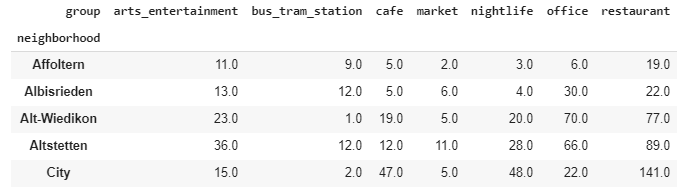

Taking a closer look at restaurant gives us the distribution of restaurants per neighborhood.

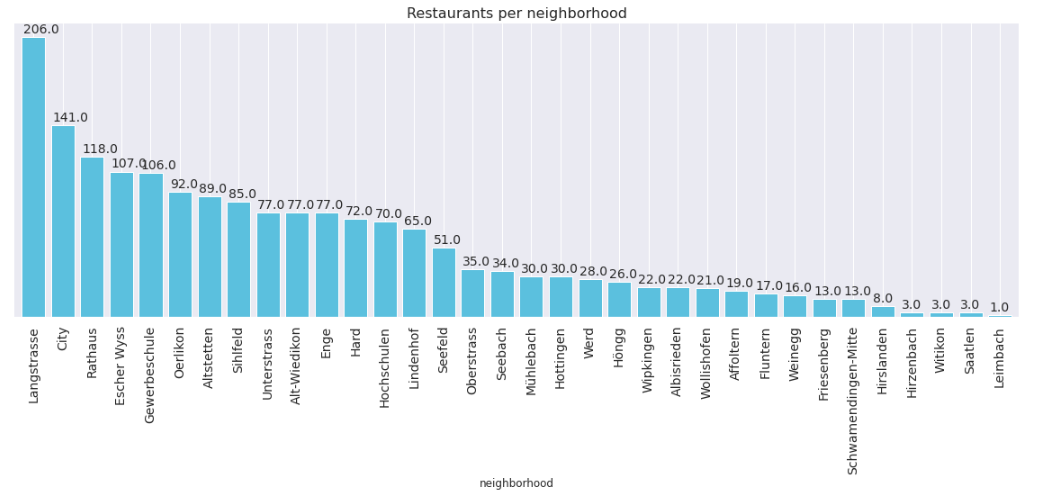

Box plot reveals outliers of neighborhoods with respect to each feature. 

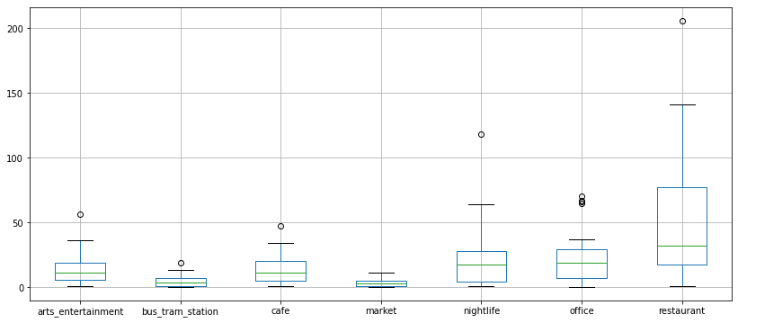

We can see that:  
- Langstrasse is the outlier in the restaurant and nightlife category
- City is the outlier in the cafe category
- Escher Wyss is the outlier in the art_entertainment category

To investigate the correlation between different venue categories, we plotted the scatter plot matrix and correlation matrix.

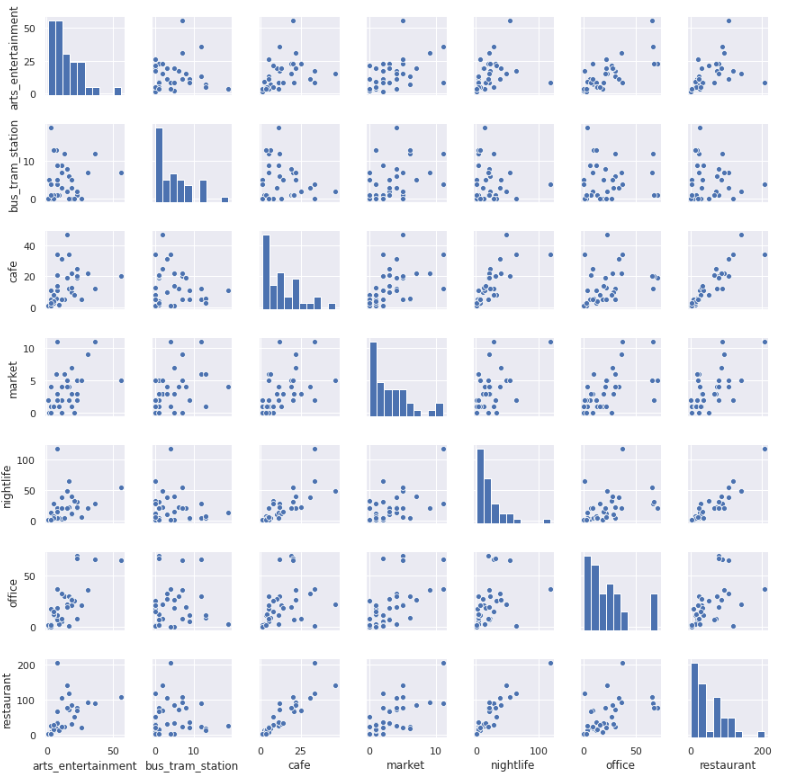

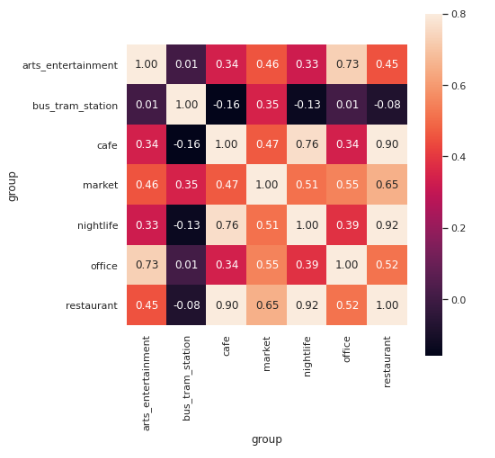


From the scatter plot and correlation matrix, we can see high correlation between nightlife, restaurant and cafe; as well as between office and arts_entertainment. Correlations between market and other categories are low.

## Cluster Analysis

First of all, we standardized the data and calculated Z-Score for each feature. 

Then, we used Principal Component Analysis (PCA) to reduce dimensions and visualize the first and second principal components to see if any clusters are formed.

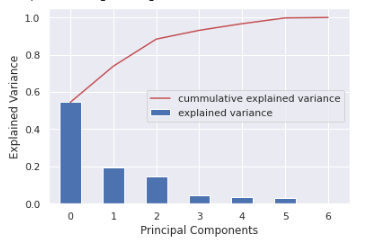

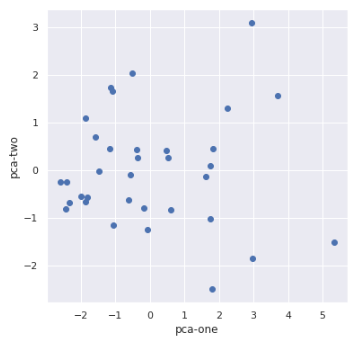

We can see that the first three principal components explained c.a. 90% of the variance. In addition, we can see vaguely three clusters in the 2D plot: first one on the left, second upper right, and third bottom right. 

Finally, we use K-means algorithm to do the clustering. In order to determine the number of clusters (k), we plot the inertia from the K-means results against k:   

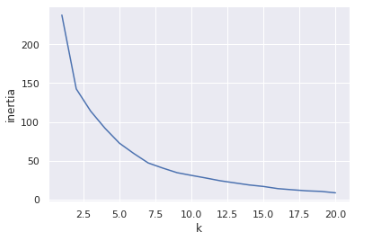

We can see the elbow point around between k=3-7. We took k=5 for our clustering to avoid too many clusters. We obtained the folowing clustering results. 

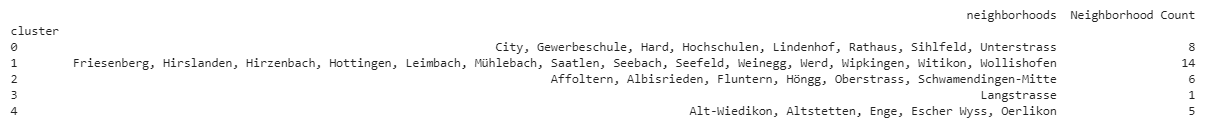

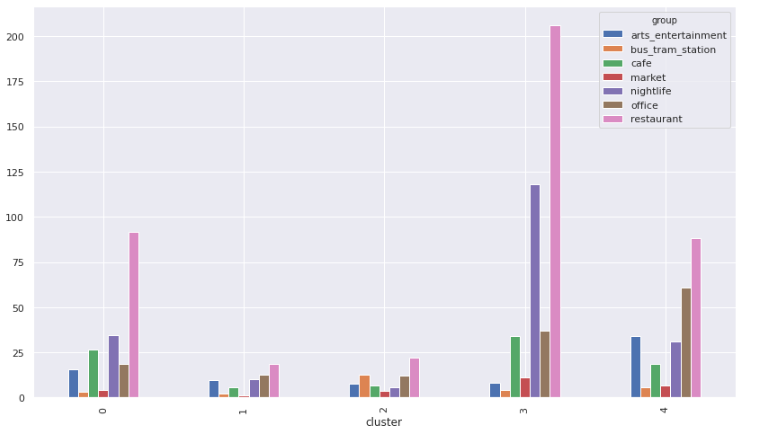

<img src="https://raw.githubusercontent.com/epflyingzhang/ibm_data_science_capstone/master/results/cluster2.png" alt="Kitten"
	title="cluster" width="600" />


The 34 neighborhoods are clustered into 5 groups. 
- Cluster 3 (red) consists of only one neighborhood: Langstrasse. No surprise as this is the well-know district for food, drinks and clubs.   
- Cluster 0 (light yellow) consists of 8 neighborhoods that are located around the city center. They are featured by high density of art and entertainment venues.
- Cluster 4 (dard red) consists of 5 neighborhoods that are a bit away from the center but with rich facilities due to their proximity to respective train stations.
- Cluster 2 (orange) consists of 6 neighborhoods that are a bit further away from the city center. They are in fact mostly relatively quite residential areas but still with public transportation to connect to other parts of the city.
- Cluster 1 (yellow) consists of the rest of 14 neighborhoods that are less populated. They are mostly on the outskirt of the city with limited public transportation options. 

# Discussion

After exploring the location data, we gained a lot more insights about the city of Zurich. The city of Zurich consists of 34 neighborhoods. By looking at the amount of restaurants, cafés, arts and entertainment venues, tram and bus stops, bar and clubs, markets, and offices in each area, we understood the characteristics of different neighborhoods. Some neighborhoods offer more options for dining and drinking, some for museems and art galleries, and some are more concentrated with offices. Cluster analysis helped us group seemly geographically disconnected neighborhoods into different clusters. The culstering results give us five groups of neighborhoods based on similarity.  

A tourist can use the results of this analysis to plan his or her city visit. A residence who is about to move home can use the clusting results to help determine potential neighborhoods to consider. City planners and adminstrators can consider applying initiatives that are proven successful in one neighborhood to other neighborhoods in the same cluster. 

However, we need to acknowledge limitations in this study:
- The choice of venue categories was limited to the accuracy and completeness of Foursquare data in Zurich. Crowd-sourced data might have smaller coverage for certain categories (e.g. offices) compared to others (e.g. restaurants). Using Google Map data might solve this issue.   

- We used abosulote number of venues as features in this analysis. Venue density with regards to area size or population of neighborhoods might describe better the 'feeling' of a disctrict. 

- We limited our study to the official 34 adminstrative neighborhoods for simplicity. In fact, the analysis could be easily extended to much smaller grids or or blocks. 

# Conclusion

In this study, we analyzed the characteristics of neighborhoods in Zurich based on venue data from Foursquare. We identified the numbers of restaurants, cafés, arts and entertainment venues, tram and bus stops, bar and clubs, markets, and offices as features for neighborhoods. We split the 34 neighborhoods into 5 groups based on a cluster analysis. Neighborhoods within one group share common characteristics. We discussed how tourists, residences and city adminstrators can potentially benefit from the results of this analyses. We acknowledged the limitations of this study and proposed areas of improvements. For example, we can replace Foursquare data with Google Map data; include population or area size data to calculate venue density; and extend the study from 34 adminstrative neighborhoods to a larger number of smaller blocks. 